# Transfer Learning with Dog Breed Dataset
This notebook is a short introduction to Transfer Learning with **mobilenet-v2 model from Tensorflow**.

There are following chapters:
* Data preparation
* Images' preprocessing
* Fun with model

We will explore a callback and Tensorflowboard too. 

# Data preparation
During the model creation I discovered that mobilenet-v2 model doesn't work properly with current version of Tensorflow. After a research I selected one of possible options to solve it. Therefore I install older version of keras and import tf_keras as tfk especially for model creation and using.

Later in this chapter there will be:
* libraries' import
* dataset creation
* checking for a few images and labels 

In [1]:
!pip install gdown

In [2]:
import gdown

# Google Drive file ID
file_id = '1No9Heo7zs8jQfVtiYzaUKzE9A0MKQjor'
#https://drive.google.com/file/d/1No9Heo7zs8jQfVtiYzaUKzE9A0MKQjor/view?usp=sharing

# Output zip file path in Kaggle environment
output_zip_path = '/kaggle/working/'

# Downloading the zip file
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_zip_path, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1No9Heo7zs8jQfVtiYzaUKzE9A0MKQjor
From (redirected): https://drive.google.com/uc?id=1No9Heo7zs8jQfVtiYzaUKzE9A0MKQjor&confirm=t&uuid=d56bcd0c-3fe5-452f-a9d8-149a0050d21c
To: /kaggle/working/Dataset_without_class_400.zip
100%|██████████| 1.04G/1.04G [00:21<00:00, 48.9MB/s]


'/kaggle/working/Dataset_without_class_400.zip'

In [3]:
import zipfile
import os

# Path to the zip file
output_zip_path = '/kaggle/working/Dataset_without_class_400.zip'

# Directory where you want to extract the files
extract_path = '/kaggle/working'

# Ensure the extract_path exists
os.makedirs(extract_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(output_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Files extracted to {extract_path}")

Files extracted to /kaggle/working


In [4]:
import os

# File path to be deleted
file_path = '/kaggle/working/Dataset_without_class_400.zip'

# Check if the file exists
if os.path.exists(file_path):
    # Delete the file
    os.remove(file_path)
    print(f"{file_path} has been deleted.")
else:
    print(f"{file_path} does not exist.")

/kaggle/working/Dataset_without_class_400.zip has been deleted.


In [5]:
# to solve a problem durnig a model creation's error we have to install an older version of tensorflow keras
!pip install tf_keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 38.4 MB/s eta 0:00:0000:01
  Attempting uninstall: keras
    Found existing installation: keras 3.2.1
    Uninstalling keras-3.2.1:
      Successfully uninstalled keras-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


In [6]:
# libraries' import
import os
import pandas as pd
import numpy as np
import datetime
import random

import tensorflow as tf
import tensorflow_hub as hub
import tf_keras as tfk

from IPython.display import Image
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

2024-05-16 08:07:27.550201: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-16 08:07:27.550293: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-16 08:07:27.676423: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [7]:
# labels dataframe preparation
labels=pd.read_csv('/kaggle/working/Train.csv')
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28386 entries, 0 to 28385
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      28386 non-null  object
 1   breed   28386 non-null  object
dtypes: object(2)
memory usage: 443.7+ KB


In [8]:
labels.sample(5)

,id,breed
24382,3a825ac9ea834ecc8b54f6681cbf1485,Dutch_Sheperd_Dog
15899,2d27671238e74916aacc0d5859d1962e,Pembroke_Welsh_Corgi
4917,51f4848182b9435690485fa1c3ebb900,Boston_Terrier
7751,40b49ccef37f4be8aeff844c2a87c1b2,Golden_Retriever
10287,4dd56a265660470b89c8f06b9721322b,Keeshond


In [9]:
# how many breeds do we have in the dataset?
len(labels['breed'].unique())

200

In [10]:
# which dog breed does have more pictures?
breed = labels.groupby(by='breed').agg({'id':'count'})
breed.sort_values(by='id', ascending=False).head(10)

,id
breed,
Maltese,297
Cairn_Terrier,284
Chow_Chow,281
Airedale_Terrier,265
Afghan_Hound,249
American_Eskimo_Dog,248
German_Shepherd,246
Dandie_Dinmont_Terrier,244
Belgian_Malinois,244


In [12]:
# create a list of filenames
filenames = ['/kaggle/working/Train/' + fname + '.jpg' for fname in labels['id'] ]
len(filenames)

28386

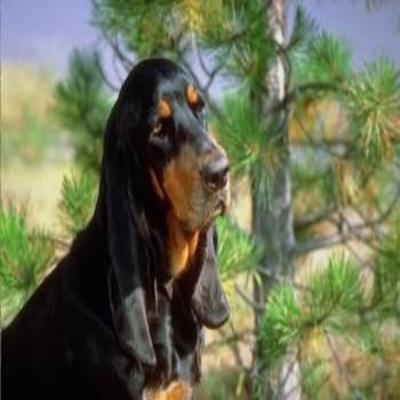

In [13]:
# check random samples if labels fit to filename
Image(filenames[1000])

In [14]:
# check the number of pictures to compare with filenames list
if len(os.listdir('/kaggle/working/Train')) == len(filenames):
    print('Great!, one step more to be sure that we have matched data')
else:
    print('check train folder')

Great!, one step more to be sure that we have matched data


In [15]:
# general X and y preparation
X = filenames
y = labels['breed']  #Label

In [16]:
# One Hot Encoding for dogs breeds (y)
y = pd.get_dummies(y)
encoding_labels = y.columns
y=y.to_numpy()

In [17]:
# create a smaller dataset for exmperiments (~5000)
number_i = 5000
X_train, X_val, y_train, y_val = train_test_split(X[:number_i], y[:number_i], test_size=0.2)

len(X_train), len(y_train), len(X_val), len(y_val)

(4000, 4000, 1000, 1000)

# Preprocessing images (turning images into tensors)

A few steps for changing images into numerical form and split it to smaller chunks (batches)

In [18]:
# parameters for image and batch size
img_size = 224
batch_size = 32

In [19]:
def prepare_image(image_path):
    '''
    turns an image into a tensor
    '''
    # read an image
    image = tf.io.read_file(image_path)
    # turn an image to numerical version
    image = tf.image.decode_jpeg(image, channels=3)
    # convert colours from 0-255 to 0-1
    image = tf.image.convert_image_dtype(image, tf.float32)
    # resize
    image = tf.image.resize(image, size=[img_size, img_size])
    
    return image

In [20]:
def get_label_image(image_path, label):
    image = prepare_image(image_path)
    
    return image, label

In [21]:
def create_batches(X, y=None, batch_size=batch_size, valid_data=False, test_data=False):
    '''
    split a dataset to batches
    '''
    if test_data:
        data = tf.data.Dataset.from_tensor_slices(tf.constant(X))
        data_batch = data.map(prepare_image).batch(batch_size)
    elif valid_data:
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
        data_batch = data.map(get_label_image).batch(batch_size)
    else:
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
        data = data.shuffle(buffer_size=len(X))
        data_batch = data.map(get_label_image).batch(batch_size)
    
    return data_batch

In [22]:
# create batches

# train data
train_data = create_batches(X_train, y_train)

# test data
valid_data = create_batches(X_val, y_val, valid_data=True)

# Create, train and validate a model

In this chapter we will (finally!) explore a tensorflow model 'mobilenet-v2' from kaggle repository.
At the begginning there will be defined:
* Input shape
* Output shape
* URL of model

Next step will be a few definition for callback (to enable logs' saving) and model creation.
Later we will check the model with a smaller dataset (1000 samples) and at the end we will train it on the whole dataset.

## Model preparation

In [23]:
# model parameters
input_shape = [None, img_size, img_size, 3]
output_shape = len(encoding_labels)
model_url = "https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1"

# number of epochs for training
num_epochs = 20

In [24]:
# load a tensorboard for callbacks
%load_ext tensorboard

In [25]:
# callbacks preparation
def create_tf_callback():
    logdir = os.path.join('/kaggle/working/',
                         datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
    
    return tf.keras.callbacks.TensorBoard(logdir)

# early stopping for callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                            patience=3)

In [38]:
# a function for model creation
def create_model(input_shape=input_shape, output_shape=output_shape, model_url=model_url):
    print('create a model with: ', model_url)
    
    # setup the model
    model = tfk.Sequential([
        hub.KerasLayer(model_url),
                       tfk.layers.Dense(units=output_shape, activation='softmax')
                       ])
    
    # compile the model
    model.compile(
        loss=tfk.losses.CategoricalCrossentropy(), 
        optimizer=tfk.optimizers.Adam(), 
        metrics=['accuracy'] 
    )
    
    # build the model
    model.build(input_shape)
    
    return model

In [49]:
def train_model():
    # Model creation
    model = create_model()
    
    # Model training and capturing the history
    history = model.fit(
        x=train_data, 
        epochs=num_epochs, 
        validation_data=valid_data, 
        validation_freq=1,
        #callbacks=[tensorboard, early_stopping]
    )
    
    return model, history

In [28]:
model = train_model()
print('\nModel Summary:')
model.summary()

Attaching model 'google/mobilenet-v2/tensorflow2/130-224-classification/1' to your Kaggle notebook...


create a model with:  https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1
Epoch 1/20


I0000 00:00:1715847220.315243     118 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


125/125 [==============================] - 33s 57ms/step - loss: 1.1866 - accuracy: 0.7285 - val_loss: 0.3824 - val_accuracy: 0.8870
Epoch 2/20
125/125 [==============================] - 5s 39ms/step - loss: 0.2290 - accuracy: 0.9312 - val_loss: 0.3329 - val_accuracy: 0.8870
Epoch 3/20
125/125 [==============================] - 5s 39ms/step - loss: 0.1361 - accuracy: 0.9660 - val_loss: 0.3074 - val_accuracy: 0.8970
Epoch 4/20
125/125 [==============================] - 5s 39ms/step - loss: 0.0948 - accuracy: 0.9787 - val_loss: 0.2885 - val_accuracy: 0.9020
Epoch 5/20
125/125 [==============================] - 5s 39ms/step - loss: 0.0687 - accuracy: 0.9883 - val_loss: 0.3044 - val_accuracy: 0.9010
Epoch 6/20
125/125 [==============================] - 5s 39ms/step - loss: 0.0554 - accuracy: 0.9898 - val_loss: 0.2942 - val_accuracy: 0.9040
Epoch 7/20
125/125 [==============================] - 5s 39ms/step - loss: 0.0453 - accuracy: 0.9920 - val_loss: 0.2936 - val_accuracy: 0.9040
Epoch 8/2

## Tensorboard logs 
If you want to use/check tensorboard - uncomment the line of code below.

In [29]:
# %tensorboard --logdir /kaggle/working

## Predictions

In [30]:
y_pred = model.predict(valid_data)

32/32 [==============================] - 2s 28ms/step


In [31]:
# function for encoding labels
def pred_labels(prediction_propabilities):
    
    return encoding_labels[np.argmax(prediction_propabilities)]
    

Is American_Foxhound predicted properly? Prediction: American_Foxhound. So:  True



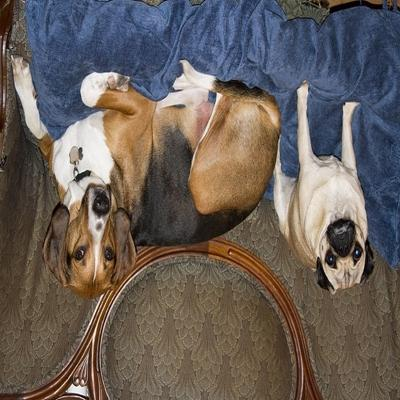

In [32]:
# check a random sample from validation dataset
index = random.randint(0, len(y_val))
label = pred_labels(y_pred[index])

print(f'Is {label} predicted properly? Prediction: {pred_labels(y_val[index])}. So:  {label==pred_labels(y_val[index])}\n')

Image(X_val[index])

# Train and validate a model on a full dataset

An action plan includes:
* split dataset to train and validation datasets
* preprocess images
* create a data batches
* create a model
* train a model
* make predictions
* compare results

In [35]:
# split dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# create batches
# train data
train_data = create_batches(X_train, y_train)

# test data
valid_data = create_batches(X_val, y_val, valid_data=True)

print(len(X_train), len(X_val), len(y_train), len(y_val))

22708 5678 22708 5678


In [50]:
# Train the model and get the history
model2, history = train_model()

print('\nModel Summary:')
model.summary()

Attaching model 'google/mobilenet-v2/tensorflow2/130-224-classification/1' to your Kaggle notebook...


create a model with:  https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1
Epoch 1/20
710/710 [==============================] - 32s 39ms/step - loss: 1.3639 - accuracy: 0.6482 - val_loss: 0.8803 - val_accuracy: 0.7372
Epoch 2/20
710/710 [==============================] - 27s 38ms/step - loss: 0.5420 - accuracy: 0.8296 - val_loss: 0.8824 - val_accuracy: 0.7483
Epoch 3/20
710/710 [==============================] - 27s 38ms/step - loss: 0.3532 - accuracy: 0.8908 - val_loss: 0.9086 - val_accuracy: 0.7490
Epoch 4/20
710/710 [==============================] - 27s 38ms/step - loss: 0.2496 - accuracy: 0.9256 - val_loss: 0.9375 - val_accuracy: 0.7504
Epoch 5/20
710/710 [==============================] - 27s 38ms/step - loss: 0.1869 - accuracy: 0.9435 - val_loss: 0.9631 - val_accuracy: 0.7496
Epoch 6/20
710/710 [==============================] - 27s 38ms/step - loss: 0.1426 - accuracy: 0.9609 - val_loss: 1.0144 - val_accuracy: 0.7510
Epoch 7/20
710/710 [===========

In [42]:
y_pred = model2.predict(valid_data)

178/178 [==============================] - 6s 29ms/step


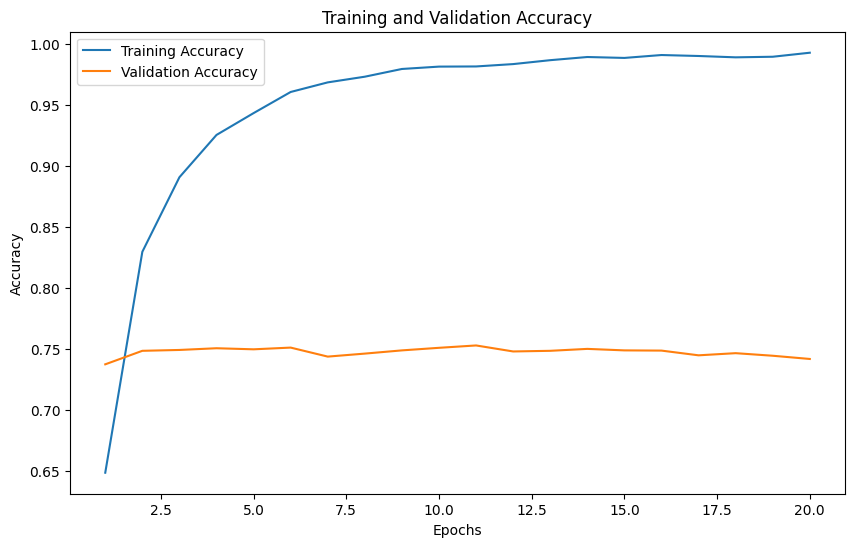

In [74]:
import matplotlib.pyplot as plt

# Extract loss and validation loss from the history object
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)  # Start from epoch 1

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


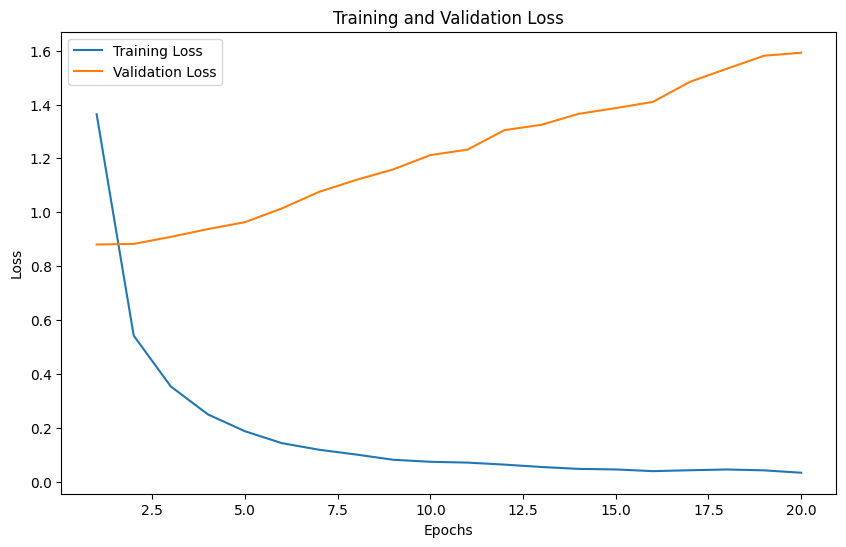

In [71]:
import matplotlib.pyplot as plt

# Extract loss and validation loss from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)  # Start from epoch 1

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [53]:
import numpy as np

# Convert predictions to class labels
y_pred_probs = model2.predict(valid_data)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_val, axis=1)  # Assuming y_val is one-hot encoded


178/178 [==============================] - 6s 28ms/step


In [64]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Compute precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

# Round off the values to two decimal places
precision = round(precision, 2)
recall = round(recall, 2)
f1 = round(f1, 2)

# Create classification report
report = classification_report(y_true_labels, y_pred_labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Round off the values in the DataFrame to two decimal places
report_df = report_df.round(decimals=2)

# Save the report to a CSV file
report_df.to_csv('classification_report1.csv', index_label='Class')

# Print the report
print(report_df)


              precision  recall  f1-score  support
0                  0.92    0.74      0.82    31.00
1                  0.95    0.85      0.90    48.00
2                  0.92    0.96      0.94    24.00
3                  0.92    0.91      0.91    53.00
4                  0.70    0.64      0.67    22.00
...                 ...     ...       ...      ...
198                0.71    0.38      0.50    13.00
199                0.41    0.50      0.45    24.00
accuracy           0.74    0.74      0.74     0.74
macro avg          0.73    0.72      0.71  5678.00
weighted avg       0.76    0.74      0.74  5678.00

[203 rows x 4 columns]


from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Compute precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

# Print precision, recall, F1 score, and support
report = classification_report(y_true_labels, y_pred_labels)
print(report)


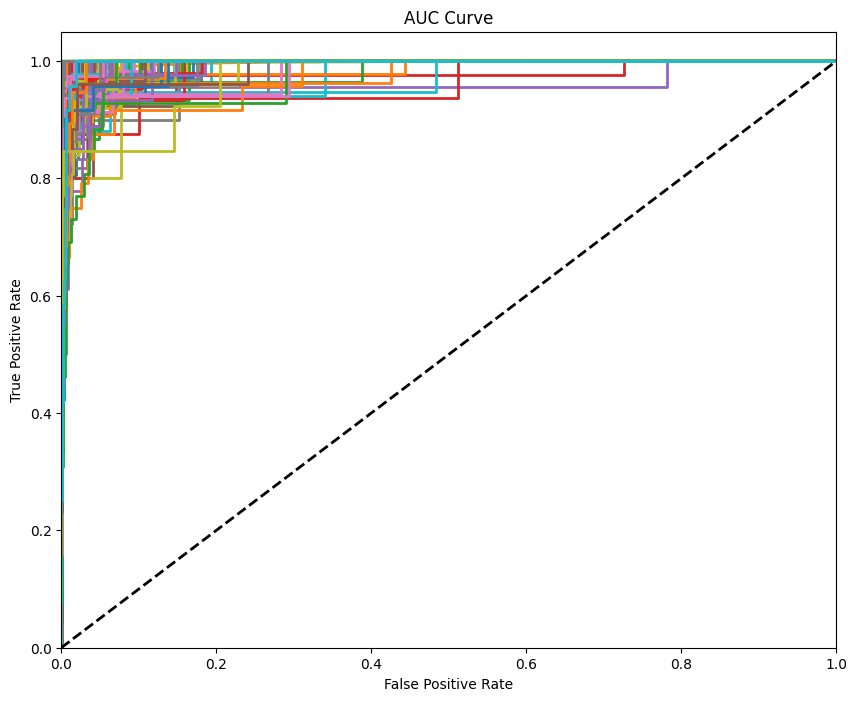

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output for multiclass ROC computation
n_classes = y_pred_probs.shape[1]
y_true_binarized = label_binarize(y_true_labels, classes=range(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_binarized.ravel(), y_pred_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr["micro"], tpr["micro"], color='darkorange', lw=2,
         label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
# Remove the legend
# plt.legend(loc="lower right")
plt.show()


Confusion Matrix:
 [[27  0  0 ...  0  0  1]
 [ 0 42  0 ...  0  0  0]
 [ 0  0 22 ...  0  0  0]
 ...
 [ 0  0  0 ... 16  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0 14]]


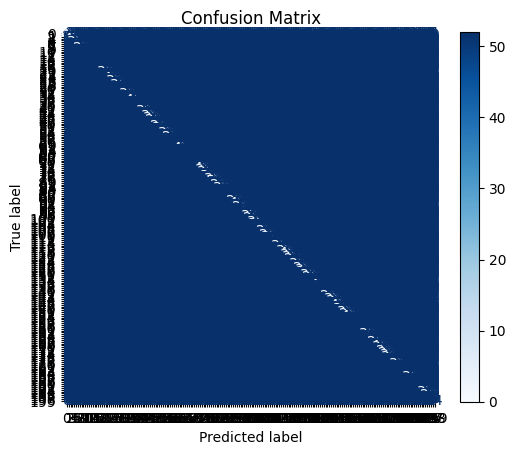

In [44]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have trained your model and have y_pred
# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_val, axis=1)  # Assuming y_val is one-hot encoded, otherwise use y_val directly

# Generate the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate TP, FP, TN, FN
# For binary classification
if cm.shape == (2, 2):
    tn, fp, fn, tp = cm.ravel()
    print(f'True Positives (TP): {tp}')
    print(f'False Positives (FP): {fp}')
    print(f'True Negatives (TN): {tn}')
    print(f'False Negatives (FN): {fn}')

# For multi-class classification
else:
    print('Confusion Matrix:\n', cm)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.show()


In [ ]:
# check a random sample from validation dataset
index = random.randint(0, len(y_val))
label = pred_labels(y_pred[index])

print(f'Is {label} predicted properly? Prediction: {pred_labels(y_val[index])}. So:  {label==pred_labels(y_val[index])}\n')

Image(X_val[index])